<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/11_(sun)_12_04_00_pm_B_NIR_savgol_not_use_R2%3D_0_8984_savgol0_8510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.graph_objects as go
import plotly.express as px

from scipy.signal import savgol_filter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename_a='/content/drive/MyDrive/machine_learning/B_NIR_DATA_csv.csv'
import pandas as pd
data_a = pd.read_csv(filename_a,header=0, 
                   encoding="unicode-escape")
data=data_a

In [ ]:
data.head()

,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_B,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,2.0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,2,True,1.8,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,3,True,6.7,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,4,True,6.2,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
4,5,False,5.1,0.253218,0.256407,0.260161,0.261418,0.261547,0.261116,0.259408,...,3.004459,3.005398,3.000151,2.995331,2.997660,2.999729,2.992129,2.987290,2.988690,2.987576


In [ ]:
xlen, ylen=data.shape
xlen, ylen

(624, 1782)

In [ ]:
xx2=data.columns[1]
xx2

'¸ðµ¨ Æ÷ÇÔ'

In [ ]:
xxx=range(6)
xxx

range(0, 6)

In [ ]:
data[xx2].values[4]==False

True

In [ ]:
a1=[]
#xlen-6
for i in range(0,xlen):
    if data[xx2].values[i]==False:
        a1.append(i)
data2=data.drop(a1,axis=0)
data2

,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_B,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,2.0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,2,True,1.8,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,3,True,6.7,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,4,True,6.2,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
12,13,True,2.2,0.137633,0.141045,0.144793,0.145757,0.145570,0.145180,0.143793,...,2.912618,2.911201,2.898590,2.887394,2.886869,2.887019,2.875892,2.863482,2.862177,2.858754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,True,8.6,0.231522,0.230534,0.231280,0.231104,0.230198,0.229698,0.229015,...,2.925508,2.927053,2.920447,2.915572,2.920224,2.922330,2.909775,2.897480,2.897737,2.897391
620,621,True,10.8,0.227531,0.226628,0.227406,0.227385,0.226585,0.225993,0.225327,...,2.945441,2.943505,2.933849,2.929372,2.934153,2.933573,2.921115,2.910637,2.914499,2.916288
621,622,True,12.2,0.224536,0.223379,0.224203,0.224431,0.223999,0.223736,0.222991,...,2.966221,2.969063,2.961253,2.952713,2.949854,2.944465,2.929207,2.920399,2.922437,2.923226
622,623,True,13.4,0.226519,0.225667,0.226440,0.226193,0.225218,0.224726,0.224143,...,2.936783,2.939133,2.927408,2.915374,2.913538,2.912847,2.901005,2.891991,2.894289,2.893951


In [ ]:
xdata=list(data2.columns)[3:]


In [ ]:
y=data2['Y_B'].values
X=data2.values[:,3:]
X
y

array([ 2.   ,  1.8  ,  6.7  ,  6.2  ,  2.2  ,  2.4  ,  4.   ,  7.8  ,
        9.4  ,  8.2  ,  3.7  ,  3.6  ,  5.7  ,  7.8  ,  6.4  , 11.9  ,
        3.7  ,  6.   ,  7.9  ,  6.5  , 12.2  ,  3.8  ,  3.1  ,  3.7  ,
        8.2  ,  9.8  ,  3.9  ,  3.7  ,  6.1  ,  8.5  ,  9.7  , 12.6  ,
        3.5  ,  3.7  ,  5.5  ,  7.7  ,  9.4  , 10.9  ,  0.6  ,  2.   ,
        3.3  ,  5.4  ,  9.7  ,  2.2  ,  2.4  ,  4.   ,  7.8  ,  9.4  ,
        8.2  ,  3.7  ,  3.6  ,  5.7  ,  7.8  ,  6.4  ,  3.7  ,  1.8  ,
        6.   ,  7.9  ,  6.5  , 12.2  ,  3.8  ,  3.1  ,  3.7  ,  8.2  ,
        9.8  ,  3.9  ,  3.7  ,  6.1  ,  8.5  ,  9.7  , 12.6  ,  3.5  ,
        3.7  ,  5.5  ,  7.7  ,  9.4  , 10.9  ,  0.6  ,  2.   ,  3.3  ,
        5.4  ,  9.7  ,  3.256,  3.185,  5.303,  7.076,  7.907, 10.775,
        2.921,  3.19 ,  5.359,  7.221,  8.563, 10.755,  3.102,  2.792,
        5.231,  7.233,  8.376, 10.826,  3.154,  2.9  ,  5.334,  7.223,
        8.483, 10.932,  3.128,  3.234,  5.305,  7.323,  8.33 , 10.531,
      

In [ ]:
X.shape, y.shape


((313, 1779), (313,))

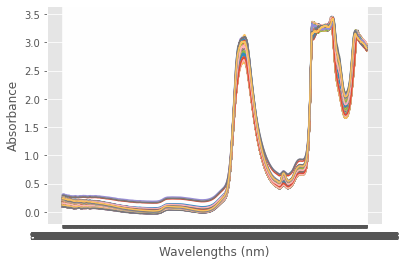

In [ ]:
with plt.style.context('ggplot'):
    plt.plot(xdata, X.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")

In [ ]:
#X2 = savgol_filter(X, 17, polyorder=2, deriv=2)
#X2 = savgol_filter(X, 17, polyorder=2, deriv=1)
X2=X

In [ ]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [ ]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

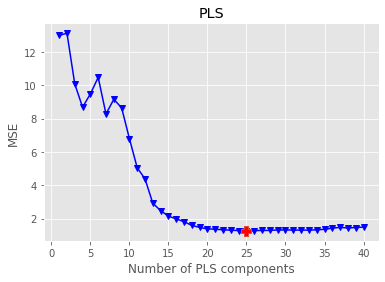

In [ ]:
plot_metrics(mses, 'MSE', 'min')

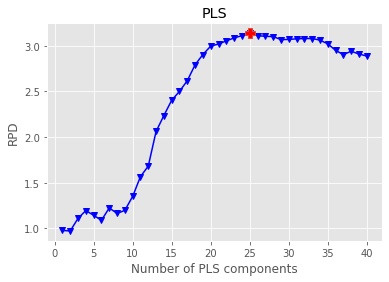

In [ ]:
plot_metrics(rpds, 'RPD', 'max')

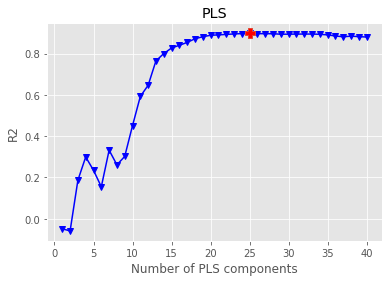

In [ ]:
plot_metrics(r2s, 'R2', 'max')

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [ ]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.3320, MSE: 8.2807, RPD: 1.2235


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 8)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.2610, MSE: 9.1609, RPD: 1.1632


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 9)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.3019, MSE: 8.6538, RPD: 1.1968


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 10)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))


R2: 0.4511, MSE: 6.8045, RPD: 1.3497


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 11)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.5925, MSE: 5.0518, RPD: 1.5664


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 25)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8984, MSE: 1.2598, RPD: 3.1369


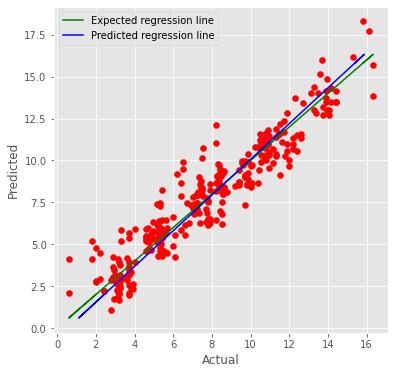

In [ ]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Expected regression line')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8451, MSE: 1.9196, RPD: 2.5411


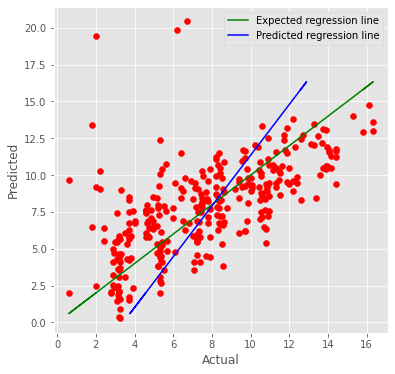

In [ ]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Expected regression line')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 9)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

In [ ]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)
#X2 = savgol_filter(X, 17, polyorder=2, deriv=1)
#X2=X

In [ ]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [ ]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

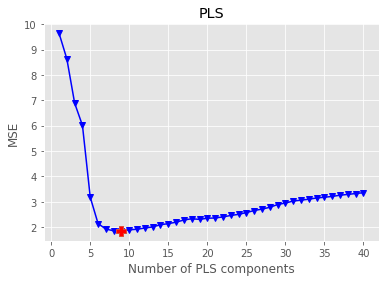

In [ ]:
plot_metrics(mses, 'MSE', 'min')

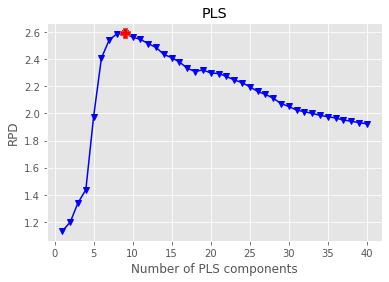

In [ ]:
plot_metrics(rpds, 'RPD', 'max')

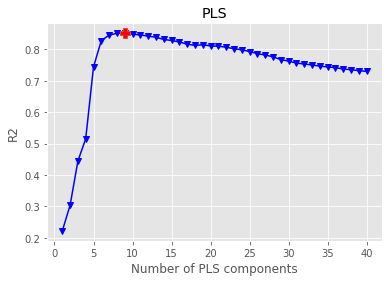

In [ ]:
plot_metrics(r2s, 'R2', 'max')

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 6)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8275, MSE: 2.1378, RPD: 2.4080


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [ ]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8451, MSE: 1.9196, RPD: 2.5411


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 9)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8510, MSE: 1.8474, RPD: 2.5903


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 9)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8510, MSE: 1.8474, RPD: 2.5903


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 10)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8476, MSE: 1.8897, RPD: 2.5612


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 11)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8457, MSE: 1.9132, RPD: 2.5454


In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 12)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.8417, MSE: 1.9625, RPD: 2.5132


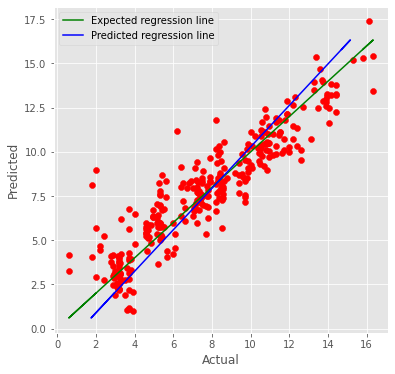

In [ ]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Expected regression line')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()